In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [2]:
df.columns = ['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df['sleep_disorder'] = df['sleep_disorder'].fillna('None')

In [6]:
df = df[['person_id', 'gender', 'age', 'physical_activity_level', 'bmi_category', 'sleep_disorder']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   person_id                374 non-null    int64 
 1   gender                   374 non-null    object
 2   age                      374 non-null    int64 
 3   physical_activity_level  374 non-null    int64 
 4   bmi_category             374 non-null    object
 5   sleep_disorder           374 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.7+ KB


In [8]:
df['bmi_category'].value_counts()

bmi_category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [9]:
df.loc[df['bmi_category'] == 'Normal', 'bmi_category'] = 'Normal Weight'

In [10]:
df['bmi_category'].value_counts()

bmi_category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

In [11]:
df['gender'].value_counts()

gender
Male      189
Female    185
Name: count, dtype: int64

In [12]:
# df.groupby('gender', observed=True)[['sleep_disorder', 'bmi_category']].value_counts().to_frame()
df.groupby(['gender', 'sleep_disorder'], observed=True)['bmi_category'].value_counts().to_frame()

count
gender sleep_disorder bmi_category        
Female Insomnia       Overweight        32
                      Normal Weight      4
       None           Normal Weight     71
                      Overweight        11
       Sleep Apnea    Overweight        63
                      Normal Weight      3
                      Obese              1
Male   Insomnia       Overweight        32
                      Normal Weight      5
                      Obese              4
       None           Normal Weight    129
                      Overweight         8
       Sleep Apnea    Obese              5
                      Normal Weight      4
                      Overweight         2

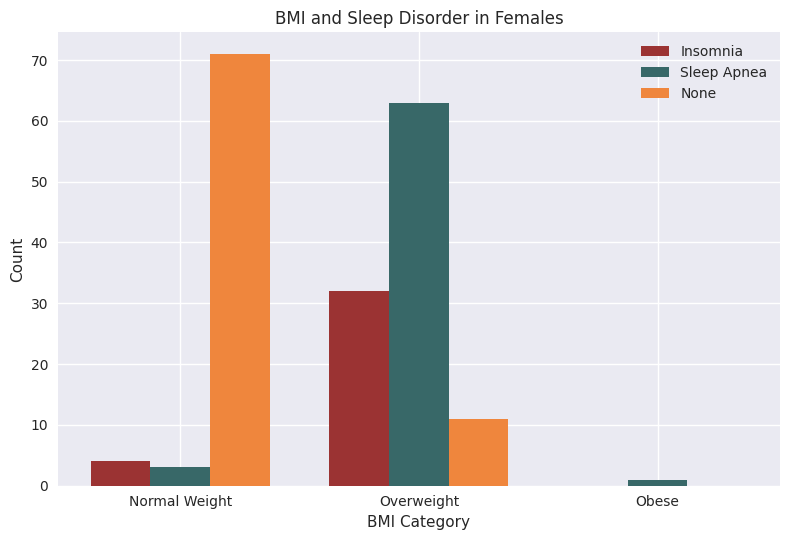

In [13]:
plt.style.use('seaborn-v0_8')

width = 0.25

fillter1 = df.loc[(df['gender'] == 'Female') & (df['sleep_disorder'] == 'Insomnia')]
x = fillter1.groupby('bmi_category')['bmi_category'].value_counts()
x = x.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
# x position in x axis
x_pos = np.arange(len(x))
plt.bar(x_pos - width, x.values, width=width, color='#9b3333', label='Insomnia')


fillter2 = df.loc[(df['gender'] == 'Female') & (df['sleep_disorder'] == 'Sleep Apnea')]
y = fillter2.groupby('bmi_category')['bmi_category'].value_counts()
y = y.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
y_pos = np.arange(len(y)) 
plt.bar(y_pos, y.values, width=width, color='#386868', label='Sleep Apnea')


fillter3 = df.loc[(df['gender'] == 'Female') & (df['sleep_disorder'] == 'None')]
z = fillter3.groupby('bmi_category')['bmi_category'].value_counts()
z = z.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
z_pos = np.arange(len(z)) 
plt.bar(z_pos + width, z.values, width=width, color='#ef863d', label='None')

plt.title('BMI and Sleep Disorder in Females')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.xticks(ticks=y_pos, labels=y.index)

plt.legend()

plt.tight_layout()
plt.show()

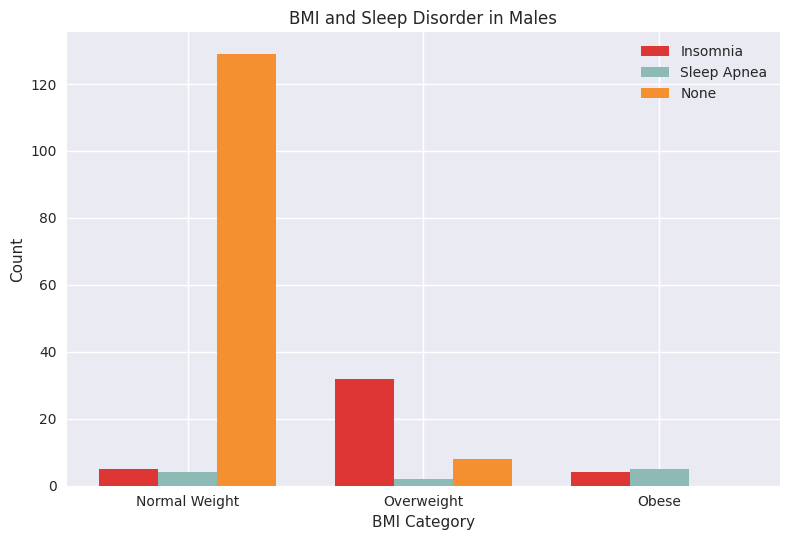

In [14]:
plt.style.use('seaborn-v0_8')

width = 0.25

fillter1 = df.loc[(df['gender'] == 'Male') & (df['sleep_disorder'] == 'Insomnia')]
x = fillter1.groupby('bmi_category')['bmi_category'].value_counts()
x = x.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
# x position in x axis
x_pos = np.arange(len(x))
plt.bar(x_pos - width, x.values, width=width, color='#de3535', label='Insomnia')


fillter2 = df.loc[(df['gender'] == 'Male') & (df['sleep_disorder'] == 'Sleep Apnea')]
y = fillter2.groupby('bmi_category')['bmi_category'].value_counts()
y = y.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
y_pos = np.arange(len(y)) 
plt.bar(y_pos, y.values, width=width, color='#8ebab5', label='Sleep Apnea')


fillter3 = df.loc[(df['gender'] == 'Male') & (df['sleep_disorder'] == 'None')]
z = fillter3.groupby('bmi_category')['bmi_category'].value_counts()
z = z.reindex(['Normal Weight', 'Overweight', 'Obese']).fillna(0)
z_pos = np.arange(len(z)) 
plt.bar(z_pos + width, z.values, width=width, color='#f49030', label='None')

plt.title('BMI and Sleep Disorder in Males')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.xticks(ticks=y_pos, labels=y.index)

plt.legend()

plt.tight_layout()
plt.show()

In [15]:
df['age_ranges'] = pd.cut(df['age'], bins=4, precision=1, labels=['age 27-35', 'age 36-43', 'age 44-51', 'age 52-59'])

In [16]:
# fillter4 = df.loc[(df['sleep_disorder'] == 'Insomnia') | (df['sleep_disorder'] == 'Sleep Apnea')]
fillter4 = df.loc[df['sleep_disorder'] != 'None']
fillter4.groupby('gender')['age'].agg(['max','mean','min'])

,max,mean,min
gender,,,
Female,59,49.378641,29
Male,49,41.192308,28


In [17]:
fillter4.groupby('gender')['age_ranges'].value_counts().to_frame()

count
gender age_ranges       
Female age 44-51      52
       age 52-59      37
       age 36-43       8
       age 27-35       6
Male   age 36-43      23
       age 44-51      21
       age 27-35       8
       age 52-59       0

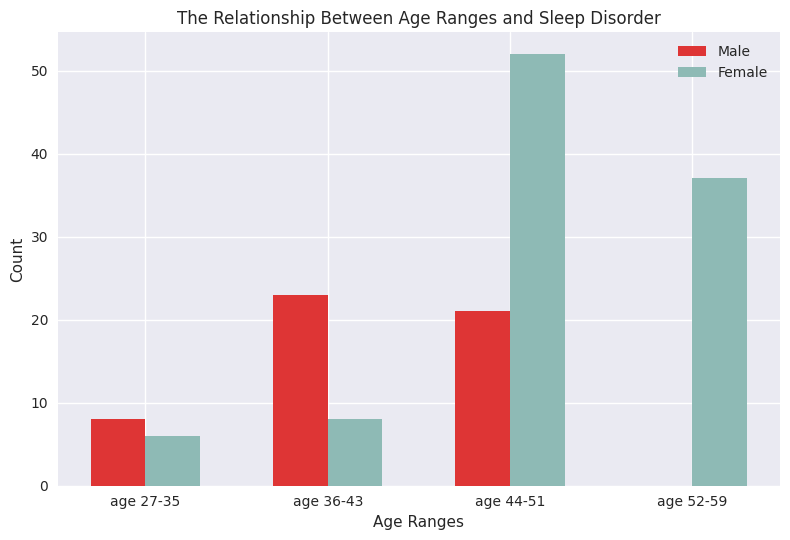

In [18]:
plt.style.use('seaborn-v0_8')

width = 0.30

fillter5_1 = fillter4[fillter4['gender']=='Male']
x = fillter5_1.groupby('age_ranges')['age_ranges'].size()
x = x.reindex(['age 27-35', 'age 36-43', 'age 44-51', 'age 52-59']).fillna(0)
# x position in x axis
x_pos = np.arange(len(x))
plt.bar(x_pos - width/2, x.values, width=width, color='#de3535', label='Male')

fillter5_2 = fillter4[fillter4['gender']=='Female']
y = fillter5_2.groupby('age_ranges')['age_ranges'].size()
y = y.reindex(['age 27-35', 'age 36-43', 'age 44-51', 'age 52-59']).fillna(0)
# y position in y axis
y_pos = np.arange(len(y))
plt.bar(y_pos + width/2, y.values, width=width, color='#8ebab5', label='Female')


plt.title('The Relationship Between Age Ranges and Sleep Disorder')
plt.xlabel('Age Ranges')
plt.ylabel('Count')

plt.xticks(ticks=x_pos, labels=x.index)

plt.legend()

plt.tight_layout()
plt.show()

In [19]:
fillter6 = df.loc[df['sleep_disorder'] == 'None']
fillter6.groupby('gender')['age'].agg(['max','mean','min'])

,max,mean,min
gender,,,
Female,59,44.926829,31
Male,44,35.510949,27


In [20]:
fillter6.groupby('gender')['age_ranges'].value_counts().to_frame()

count
gender age_ranges       
Female age 36-43      36
       age 52-59      31
       age 44-51      11
       age 27-35       4
Male   age 27-35      76
       age 36-43      59
       age 44-51       2
       age 52-59       0

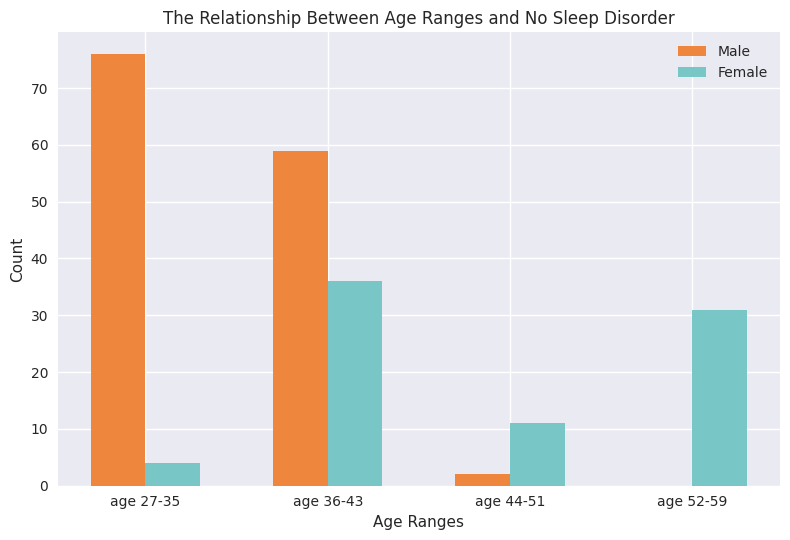

In [21]:
plt.style.use('seaborn-v0_8')

width = 0.30

fillter6_1 = fillter6[fillter6['gender']=='Male']
x = fillter6_1.groupby('age_ranges')['age_ranges'].size()
x = x.reindex(['age 27-35', 'age 36-43', 'age 44-51', 'age 52-59']).fillna(0)
# x position in x axis
x_pos = np.arange(len(x))
plt.bar(x_pos - width/2, x.values, width=width, color='#ef863d', label='Male')

fillter6_2 = fillter6[fillter6['gender']=='Female']
y = fillter6_2.groupby('age_ranges')['age_ranges'].size()
y = y.reindex(['age 27-35', 'age 36-43', 'age 44-51', 'age 52-59']).fillna(0)
# y position in y axis
y_pos = np.arange(len(y))
plt.bar(y_pos + width/2, y.values, width=width, color='#79c6c6', label='Female')


plt.title('The Relationship Between Age Ranges and No Sleep Disorder')
plt.xlabel('Age Ranges')
plt.ylabel('Count')

plt.xticks(ticks=x_pos, labels=x.index)

plt.legend()

plt.tight_layout()
plt.show()

# Summary
1. A survey was conducted on 185 females, with the highest number being those with No Sleep Disorder (82), followed by those with Sleep Apnea (67),and Insomnia (36), respectively.
2. A survey was conducted on 189 males, with the highest number being those with No Sleep Disorder (137), followed by those with Insomnia (41),and Sleep Apnea (11), respectively.
3. The majority of females with Insomnia and Sleep Apnea are in the Overweight group.
4. The majority of males with Insomnia are in the Overweight group.
5. The majority of females with a Sleep Disorder are in the age range of 44-51 years, with an average age of 49.38 years.
6. The majority of males with a Sleep Disorder are in the age range of 36-43 years, with an average age of 41.19 years.
7. The majority of females with No Sleep Disorder are in the age range of 36-43 years, with an average age of 44.93 years.
8. The majority of males with No Sleep Disorder are in the age range of 27-35 years, with an average age of 35.51 years.